In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [0]:
df = pd.read_csv('synth_temp.csv')

In [0]:
df.head()

,Region,Year,RgnAvTemp
0,A,1841,10.851828
1,B,1841,14.315283
2,E,1841,11.649495
3,F,1841,13.189420
4,A,1842,13.423196


There are 4 points in 1841
and 12 points in 2010
and 12 points in 1902


,Region,Year,RgnAvTemp
292,A,1902,17.423058
293,B,1902,18.430935
294,C,1902,17.480533
295,D,1902,21.019539
296,E,1902,16.550045


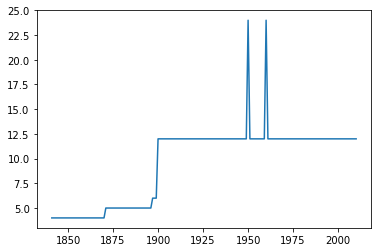

In [0]:
#
# take a quick look at the number of data points per year
#
print('There are ' + 
      str(len(df.loc[df['Year'] == 1841])) + 
      ' points in 1841\n' +
      'and ' +
      str(len(df.loc[df['Year'] == 2010])) +
      ' points in 2010\n' +
      'and ' +
      str(len(df.loc[df['Year'] == 1902])) +
      ' points in 1902')
#
# seeing there are differnt numbers of points, let's do a quick chart
#
plt.plot(df['Year'].unique(), [len(df.loc[df['Year'] == i]) for i in df['Year'].unique()])
#
# slice 1902 and forward
#
df = df.loc[df.Year > 1901]
df.head()

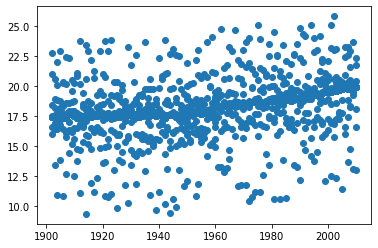

In [0]:
#
# quick plot to understand the data so far
#
plt.scatter(df.Year, df.RgnAvTemp)

In [0]:
#
# roll up by year
#
df_group_year = df.groupby('Year').agg(['mean']).rename(columns = {'RgnAvTemp' : 'AvgTemp'})
print(df_group_year.head())
print(df_group_year.tail())

        AvgTemp
           mean
Year           
1902  18.066397
1903  17.406894
1904  17.581938
1905  17.829110
1906  17.383751
        AvgTemp
           mean
Year           
2006  19.827747
2007  19.531671
2008  19.607265
2009  19.588214
2010  19.293266


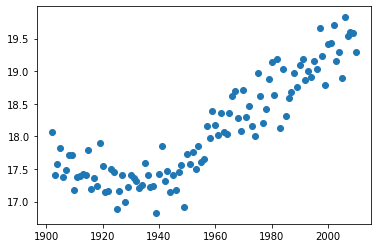

In [0]:
#
# visualize result of averaging over each year
#
plt.scatter(df_group_year.index, df_group_year['AvgTemp'])

In [0]:
window = 10
smoothed_df = \
  df_group_year.AvgTemp.rolling(window).mean()
print(smoothed_df.head(14))
print(smoothed_df.tail())

           mean
Year           
1902        NaN
1903        NaN
1904        NaN
1905        NaN
1906        NaN
1907        NaN
1908        NaN
1909        NaN
1910        NaN
1911  17.574942
1912  17.507390
1913  17.509281
1914  17.491669
1915  17.488390
           mean
Year           
2006  19.340934
2007  19.327987
2008  19.365692
2009  19.446429
2010  19.433741


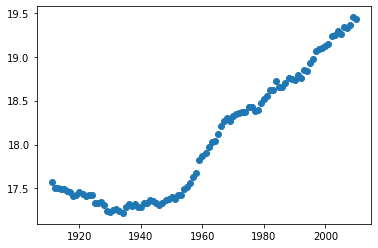

In [0]:
#
# filter out the NaN values
#
smoothed_df = smoothed_df[smoothed_df['mean'].notnull()]
#
# quick plot to understand what we have so far
#
plt.scatter(smoothed_df.index, smoothed_df['mean'])

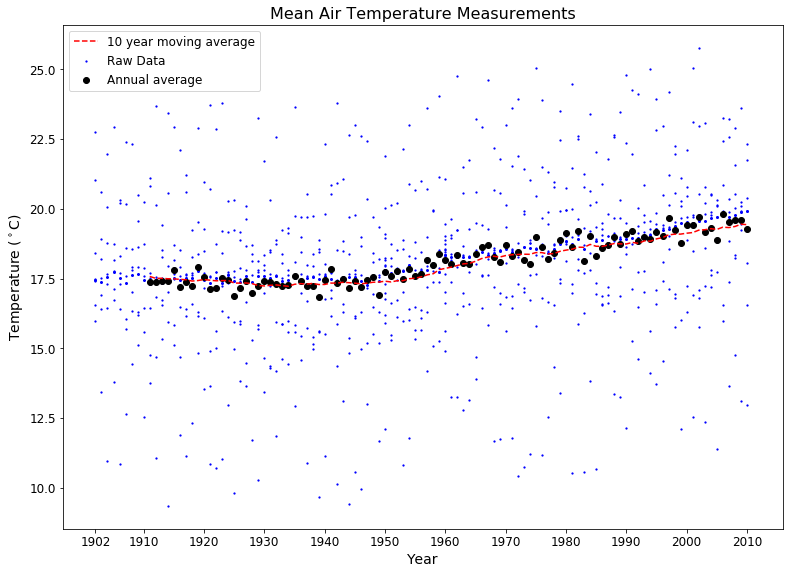

In [0]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_axes([1, 1, 1, 1]);
#
# Raw data
#
raw_plot_data = df[df.Year > 1901]
ax.scatter(raw_plot_data.Year, 
           raw_plot_data.RgnAvTemp, 
           label = 'Raw Data', c = 'blue',
           s = 1.5)
#
# Annual averages
#
annual_plot_data = df_group_year.filter(items = smoothed_df.index, axis = 0)
ax.scatter(annual_plot_data.index, 
           annual_plot_data.AvgTemp, 
           label = 'Annual average', c = 'k')
#
# Moving averages
#
ax.plot(smoothed_df.index, 
        smoothed_df, 
        c = 'r', 
        linestyle = '--', 
        label = f'{window} year moving average')
#
ax.set_title('Mean Air Temperature Measurements',
             fontsize = 16)
#
# make the ticks include the first and last years
#
tick_years = [1902] + list(range(1910, 2011, 10))
ax.set_xlabel('Year', 
              fontsize = 14)
ax.set_ylabel('Temperature ($^\circ$C)', 
              fontsize = 14)
ax.set_xticks(tick_years)
ax.tick_params(labelsize = 12)
ax.legend(fontsize = 12)

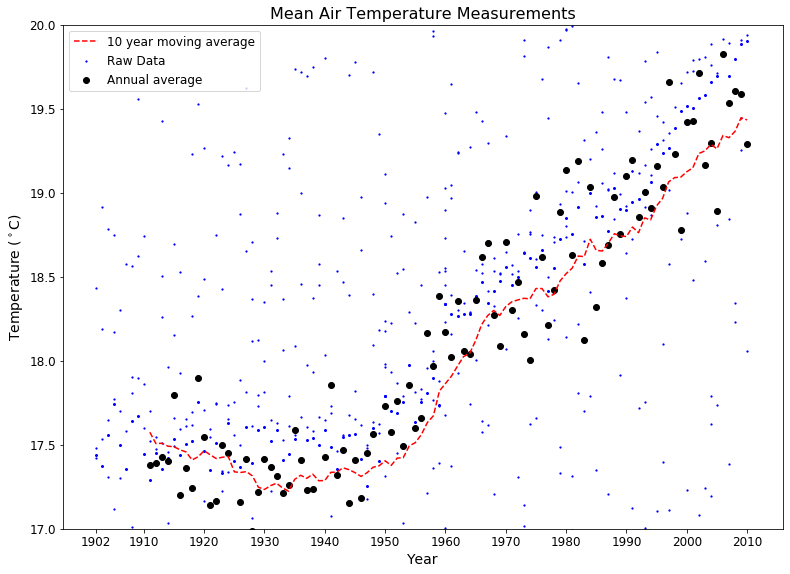

In [0]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_axes([1, 1, 1, 1]);
#
# Raw data
#
raw_plot_data = df[df.Year > 1901]
ax.scatter(raw_plot_data.Year, 
           raw_plot_data.RgnAvTemp, 
           label = 'Raw Data', c = 'blue',
           s = 1.5)
#
# Annual averages
#
annual_plot_data = df_group_year.filter(items = smoothed_df.index, axis = 0)
ax.scatter(annual_plot_data.index, 
           annual_plot_data.AvgTemp, 
           label = 'Annual average', c = 'k')
#
# Moving averages
#
ax.plot(smoothed_df.index, 
        smoothed_df, 
        c = 'r', 
        linestyle = '--', 
        label = f'{window} year moving average')
#
ax.set_title('Mean Air Temperature Measurements',
             fontsize = 16)
#
# make the ticks include the first and last years
#
tick_years = [1902] + list(range(1910, 2011, 10))
ax.set_xlabel('Year', 
              fontsize = 14)
ax.set_ylabel('Temperature ($^\circ$C)', 
              fontsize = 14)
ax.set_ylim(17, 20)
ax.set_xticks(tick_years)
ax.tick_params(labelsize = 12)
ax.legend(fontsize = 12)